In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
creatures = pd.read_csv("../data/creatures.csv")
timestamp = pd.read_csv("../data/real_time_stats.csv")

In [25]:
creatures.tail()

,Unnamed: 0,id,parent,generation,birth_time,death_time,max_speed,max_turn_rate,radius,energy_for_reproduction,time_between_reproduction,percent_energy_for_child,viewable_distance,fov,num_brain_nodes,num_brain_connections
22561,22561,22562,22378.0,186,3778.877667,NaN,300.000000,6.280000,27.247562,25.715855,14.197274,0.541521,377.686164,1.000000,7,6
22562,22562,22563,22473.0,165,3779.044667,NaN,284.116348,6.204376,19.576626,30.829117,14.842068,0.664112,500.000000,1.000000,8,7
22563,22563,22564,22541.0,239,3779.364667,NaN,300.000000,6.186939,22.268818,22.141581,5.000000,0.802454,458.777428,1.000000,8,8
22564,22564,22565,22497.0,188,3779.482667,NaN,299.570612,6.090326,22.829824,18.444330,5.000000,0.659870,500.000000,1.000000,7,7
22565,22565,22566,22208.0,218,3779.530667,NaN,300.000000,3.807284,22.747957,41.905045,16.693372,0.861841,500.000000,1.155949,7,9


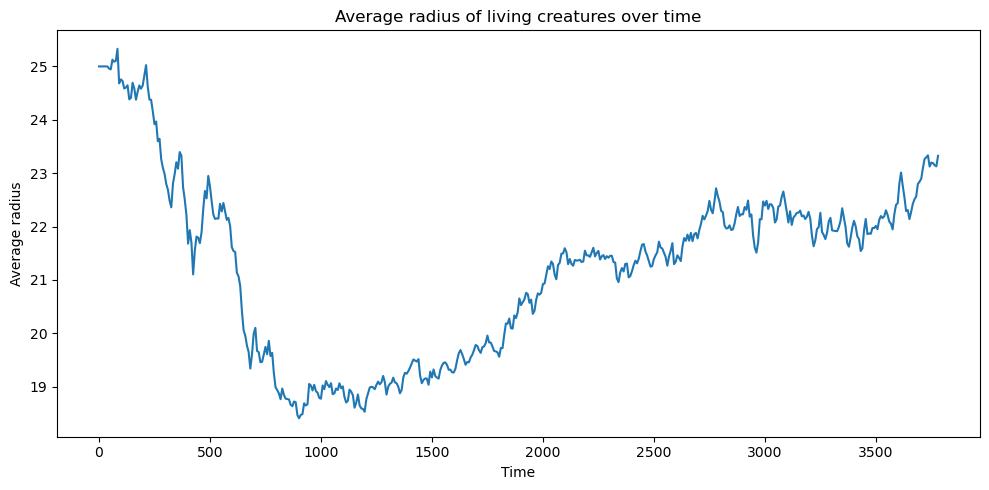

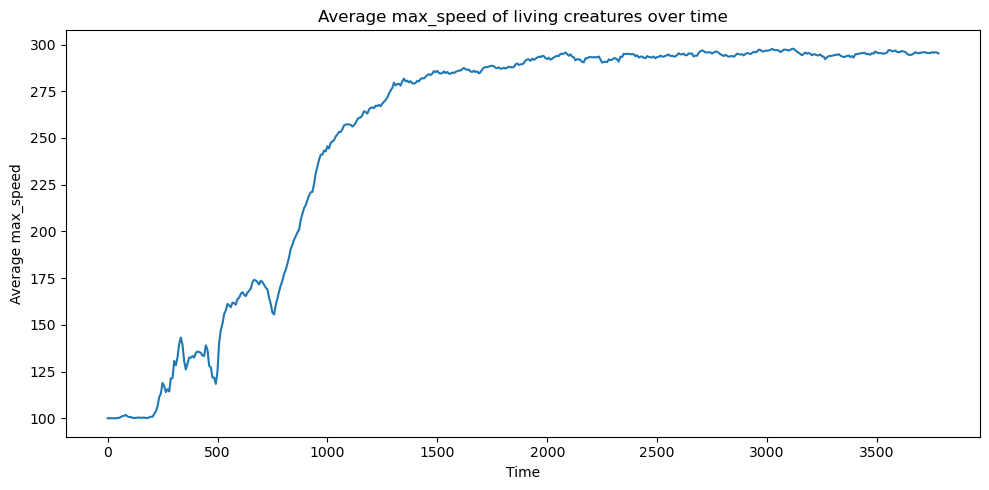

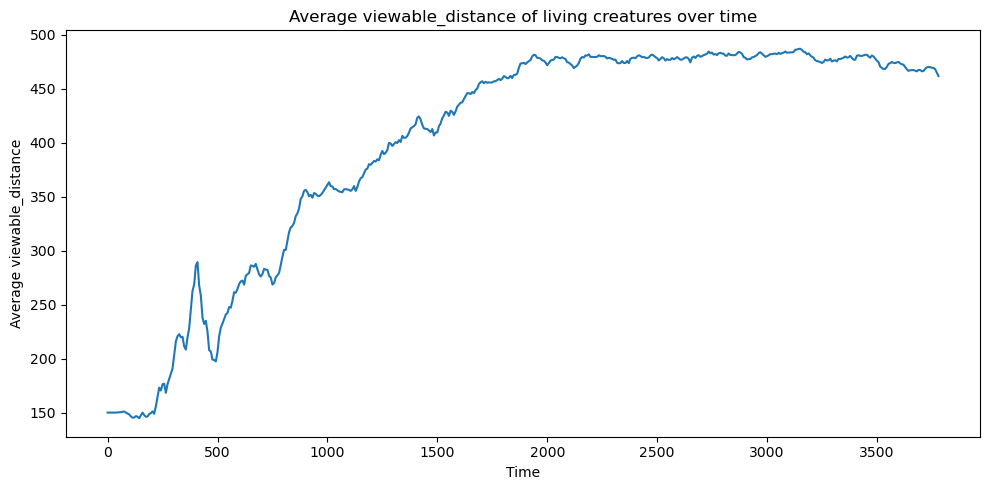

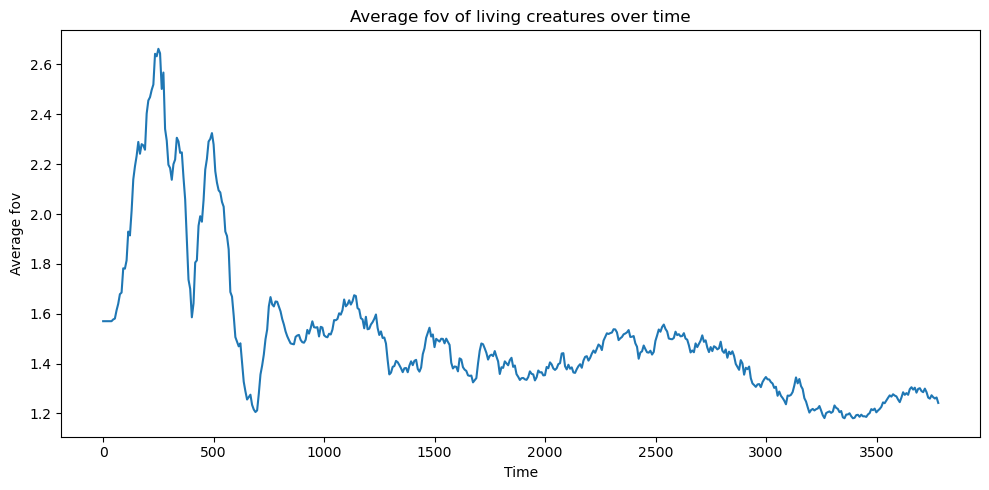

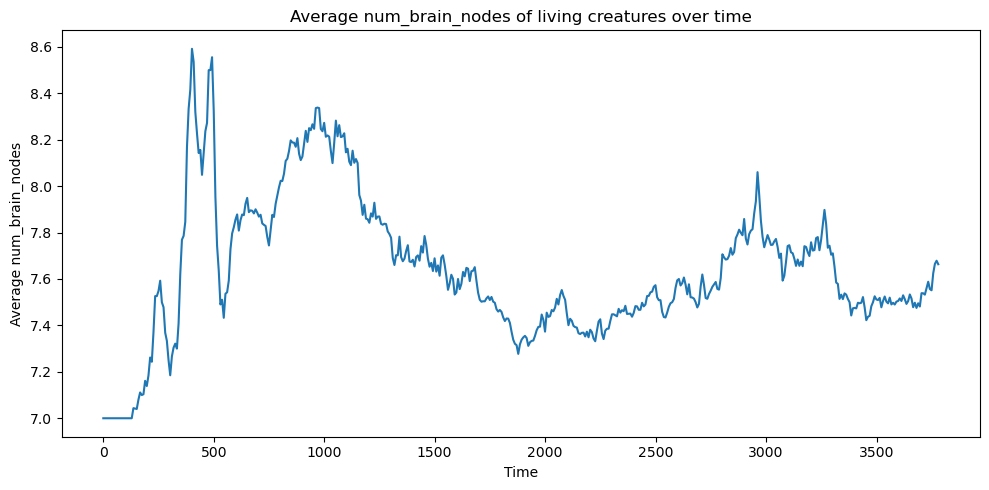

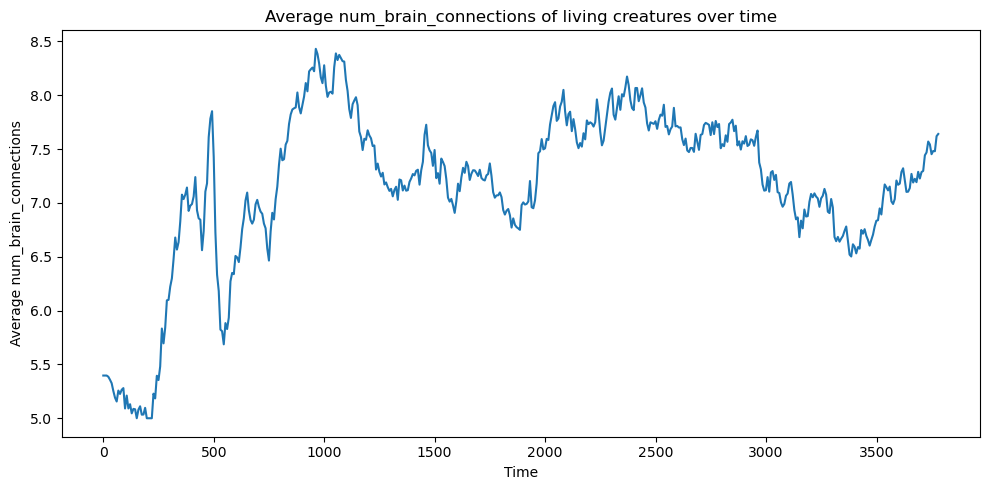

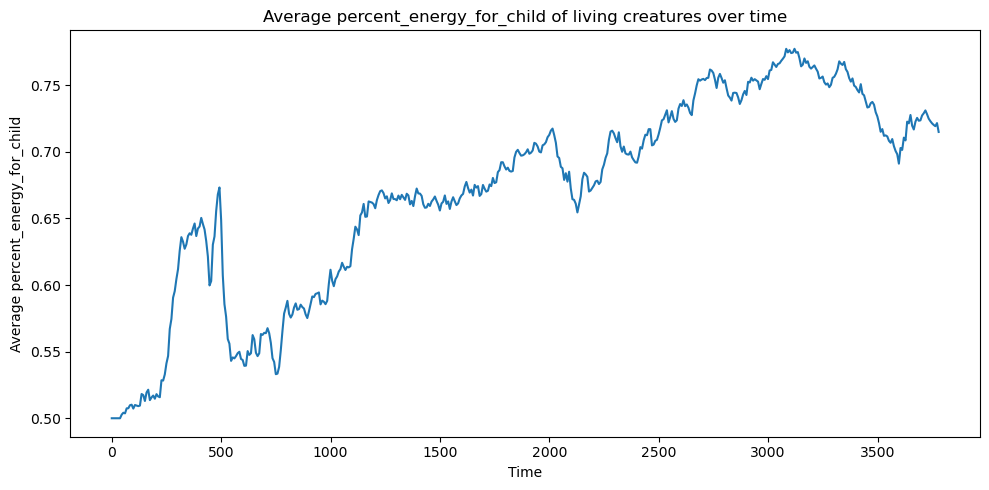

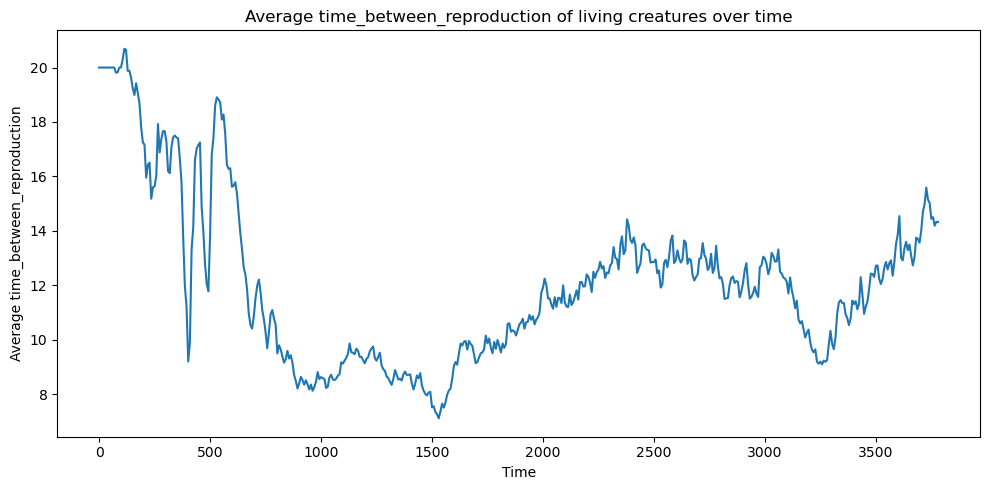

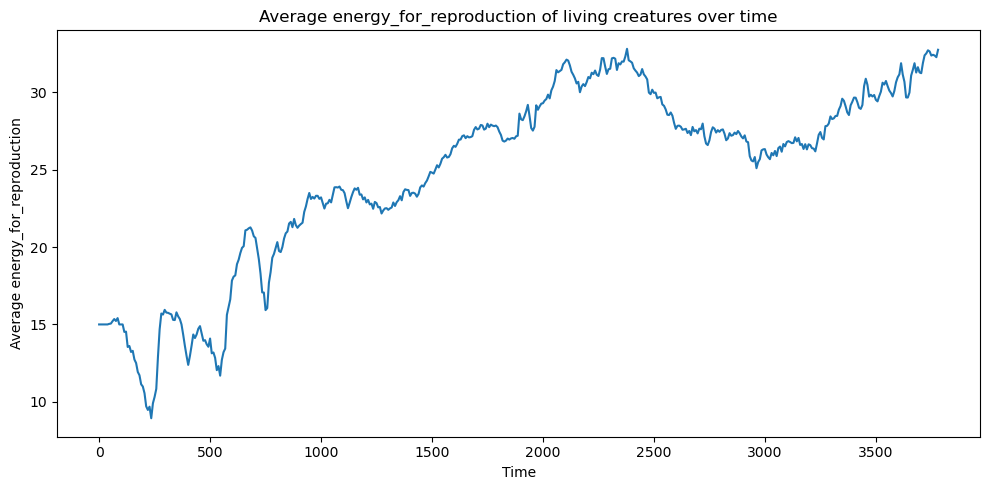

In [26]:
features = ["radius", "max_speed", "viewable_distance", "fov", "num_brain_nodes", "num_brain_connections", "percent_energy_for_child", "time_between_reproduction", "energy_for_reproduction"]
for feature in features:
    # Create a time range spanning all births and deaths
    t_min = creatures["birth_time"].min()
    t_max = creatures["death_time"].max()
    timesteps = np.linspace(t_min, t_max, 500)

    # For each timestep, find creatures alive and compute average
    averages = []
    for t in timesteps:
        alive = creatures[(creatures["birth_time"] <= t) & ((creatures["death_time"] >= t) | creatures["death_time"].isna())]
        averages.append(alive[feature].mean())

    plt.figure(figsize=(10, 5))
    plt.plot(timesteps, averages)
    plt.xlabel("Time")
    plt.ylabel(f"Average {feature}")
    plt.title(f"Average {feature} of living creatures over time")
    plt.tight_layout()
    plt.show()

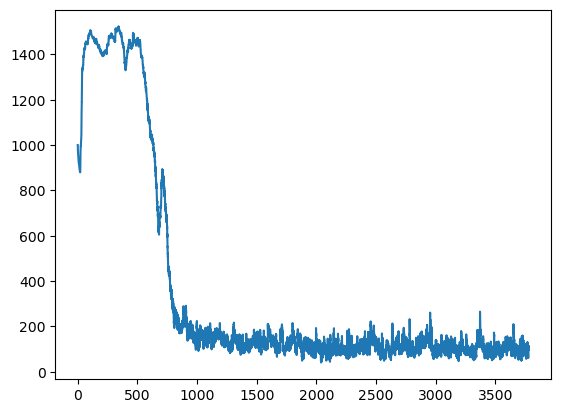

In [27]:
plt.plot(timestamp["time"], timestamp["num_food"])

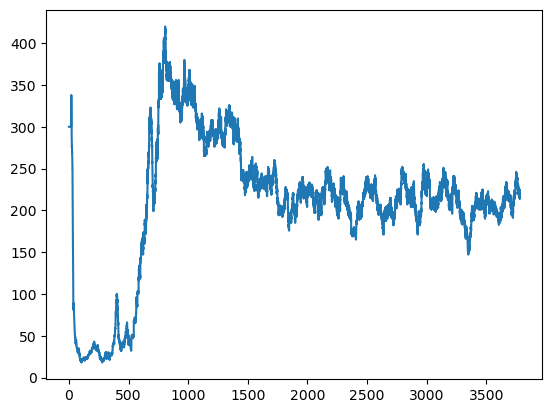

In [28]:
plt.plot(timestamp["time"], timestamp["num_creatures"])